## Acessando as urls com os aquivos disponibilizados
Os arquivos estão disponíveis no Portal Dados Abertos, no conjunto de dados do Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome (MDS), acessado em https://dados.gov.br/dados/organizacoes/visualizar/ministerio-do-desenvolvimento-e-assistencia-social-familia-e-combate-a-fome

In [1]:
url_cad_2023 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2023*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2022 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2022*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2021 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2021*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2020 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2020*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2019 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2019*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2018 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2018*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2017 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2017*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2016 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2016*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2015 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2015*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2014 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2014*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2013 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2013*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2012 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2012*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2011 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2011*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2010 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2010*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2009 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2009*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2008 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2008*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2007 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2007*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
url_cad_2006 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2006*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'

## Dicionário do conjunto de dados

### Neste conjunto de dados temos as seguintes variáveis:

ibge: código ibge do município

anomes: Ano/mês de referência do dado

cadunico_tot_fam: total de famílias cadastradas

cadunico_tot_pes: total de pessoas cadastradas

cadunico_tot_fam_rpc_ate_meio_sm: total de famílias com renda per capita até meio salário mínimo

cadunico_tot_pes_rpc_ate_meio_sm:: total de pessoas com renda per capita até meio salário mínimo

cadunico_tot_fam_pob: total de famílias em situação de pobreza

cadunico_tot_pes_pob: total de pessoas em situação de pobreza

cadunico_tot_fam_ext_pob: total de famílias em situação de extrema pobreza

cadunico_tot_pes_ext_pob: total de pessoas em situação de extrema pobreza

cadunico_tot_fam_pob_e_ext_pob: total de famílias em situação de pobreza e de extrema pobreza

cadunico_tot_pes_pob_e_ext_pob: total de pessoas em situação de pobreza e de extrema pobreza

Situação de extrema pobreza

### Até abril de 2014: renda per capita menor igual a 70 reais
De maio de 2014 a junho de 2016: renda per capita menor igual a 77 reais
De julho de 2016 a maio de 2018: renda per capita menor igual a 85 reais
De junho de 2018 em diante: renda per capita menor igual a 89 reais
Situação de pobreza

### Até abril de 2014: renda per capita de 70,01 reais a 140 reais
De maio de 2014 a junho de 2016: renda per capita de 77,01 reais a 154 reais
De julho de 2016 a maio de 2018: renda per capita de 85,01 reais a 170 reais
De junho de 2018 em diante: renda per capita de 89,01 reais a 178 reais

*As definições de extrema pobreza e pobreza são atualizadas ao longo dos anos, conforme o Art. 18 do Decreto nº 5.209 de 17/09/2004.

In [2]:
import pandas as pd

In [3]:
df_cad_2023 = pd.read_csv(url_cad_2023, sep = ",")
df_cad_2022 = pd.read_csv(url_cad_2022, sep = ",")
df_cad_2021 = pd.read_csv(url_cad_2021, sep = ",")
df_cad_2020 = pd.read_csv(url_cad_2020, sep = ",")
df_cad_2019 = pd.read_csv(url_cad_2019, sep = ",")
df_cad_2018 = pd.read_csv(url_cad_2018, sep = ",")
df_cad_2017 = pd.read_csv(url_cad_2017, sep = ",")
df_cad_2016 = pd.read_csv(url_cad_2016, sep = ",")
df_cad_2015 = pd.read_csv(url_cad_2015, sep = ",")
df_cad_2014 = pd.read_csv(url_cad_2014, sep = ",")
df_cad_2013 = pd.read_csv(url_cad_2013, sep = ",")
df_cad_2012 = pd.read_csv(url_cad_2012, sep = ",")
df_cad_2011 = pd.read_csv(url_cad_2011, sep = ",")
df_cad_2010 = pd.read_csv(url_cad_2010, sep = ",")
df_cad_2009 = pd.read_csv(url_cad_2009, sep = ",")
df_cad_2008 = pd.read_csv(url_cad_2008, sep = ",")
df_cad_2007 = pd.read_csv(url_cad_2007, sep = ",")
df_cad_2006 = pd.read_csv(url_cad_2006, sep = ",")

## Analisando os Dataframes criados de cada ano
No Portal Dados Abertos estão disponibilizados arquivos de 2006 a 2023. Ao analisar cada arquivo observou-se que os dados de faixa de renda constam a partir dos arquivos de 2012. Desta forma, a análise de mobilidade de renda será feita a partir de dados do Cadastro Único de 2012 a 2023. Também, foi identificado que alguns meses de 2012 estão com dados ausentes. 

In [4]:
# Base de 2023
df_cad_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44560 entries, 0 to 44559
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              44560 non-null  int64
 1   anomes                            44560 non-null  int64
 2   cadunico_tot_fam                  44560 non-null  int64
 3   cadunico_tot_pes                  44560 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  44560 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  44560 non-null  int64
 6   cadunico_tot_fam_pob              44560 non-null  int64
 7   cadunico_tot_pes_pob              44560 non-null  int64
 8   cadunico_tot_fam_ext_pob          44560 non-null  int64
 9   cadunico_tot_pes_ext_pob          44560 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    44560 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    44560 non-null  int64
dtypes: int64(12)
memory usage: 4.1 M

In [5]:
df_cad_2023.head()

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,202308,4863,12536,2916,8712,753,2403,794,2176,1547,4579
1,110002,202308,18435,43034,11545,30454,2826,7904,3326,8153,6152,16057
2,110003,202308,933,2529,596,1807,159,493,112,310,271,803
3,110004,202308,18058,42056,10222,27382,2302,6428,3467,8541,5769,14969
4,110005,202308,3136,7653,1876,5311,531,1524,554,1557,1085,3081


In [6]:
# Base de 2022
df_cad_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [7]:
# Base de 2021
df_cad_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [8]:
# Base de 2020
df_cad_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [9]:
# Base de 2019
df_cad_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [10]:
# Base de 2018
df_cad_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [11]:
# Base de 2017
df_cad_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [12]:
# Base de 2016
df_cad_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66840 entries, 0 to 66839
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66840 non-null  int64
 1   anomes                            66840 non-null  int64
 2   cadunico_tot_fam                  66840 non-null  int64
 3   cadunico_tot_pes                  66840 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66840 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66840 non-null  int64
 6   cadunico_tot_fam_pob              66840 non-null  int64
 7   cadunico_tot_pes_pob              66840 non-null  int64
 8   cadunico_tot_fam_ext_pob          66840 non-null  int64
 9   cadunico_tot_pes_ext_pob          66840 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66840 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66840 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [13]:
# Base de 2015
df_cad_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66836 entries, 0 to 66835
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66836 non-null  int64
 1   anomes                            66836 non-null  int64
 2   cadunico_tot_fam                  66836 non-null  int64
 3   cadunico_tot_pes                  66836 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66836 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66836 non-null  int64
 6   cadunico_tot_fam_pob              66836 non-null  int64
 7   cadunico_tot_pes_pob              66836 non-null  int64
 8   cadunico_tot_fam_ext_pob          66836 non-null  int64
 9   cadunico_tot_pes_ext_pob          66836 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66836 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66836 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [14]:
# Base de 2014
df_cad_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66826 entries, 0 to 66825
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66826 non-null  int64
 1   anomes                            66826 non-null  int64
 2   cadunico_tot_fam                  66826 non-null  int64
 3   cadunico_tot_pes                  66826 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66826 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66826 non-null  int64
 6   cadunico_tot_fam_pob              66826 non-null  int64
 7   cadunico_tot_pes_pob              66826 non-null  int64
 8   cadunico_tot_fam_ext_pob          66826 non-null  int64
 9   cadunico_tot_pes_ext_pob          66826 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66826 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66826 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [15]:
# Base de 2013
df_cad_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66789 entries, 0 to 66788
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ibge                              66789 non-null  int64
 1   anomes                            66789 non-null  int64
 2   cadunico_tot_fam                  66789 non-null  int64
 3   cadunico_tot_pes                  66789 non-null  int64
 4   cadunico_tot_fam_rpc_ate_meio_sm  66789 non-null  int64
 5   cadunico_tot_pes_rpc_ate_meio_sm  66789 non-null  int64
 6   cadunico_tot_fam_pob              66789 non-null  int64
 7   cadunico_tot_pes_pob              66789 non-null  int64
 8   cadunico_tot_fam_ext_pob          66789 non-null  int64
 9   cadunico_tot_pes_ext_pob          66789 non-null  int64
 10  cadunico_tot_fam_pob_e_ext_pob    66789 non-null  int64
 11  cadunico_tot_pes_pob_e_ext_pob    66789 non-null  int64
dtypes: int64(12)
memory usage: 6.1 M

In [16]:
# Base de 2012
df_cad_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61215 entries, 0 to 61214
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              61215 non-null  int64  
 1   anomes                            61215 non-null  int64  
 2   cadunico_tot_fam                  61215 non-null  int64  
 3   cadunico_tot_pes                  50085 non-null  float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  50085 non-null  float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  50085 non-null  float64
 6   cadunico_tot_fam_pob              50085 non-null  float64
 7   cadunico_tot_pes_pob              50085 non-null  float64
 8   cadunico_tot_fam_ext_pob          50085 non-null  float64
 9   cadunico_tot_pes_ext_pob          50085 non-null  float64
 10  cadunico_tot_fam_pob_e_ext_pob    50085 non-null  float64
 11  cadunico_tot_pes_pob_e_ext_pob    50085 non-null  float64
dtypes: f

### Analisando os dados de 2012 com mais detalhe pois foi identificado que tem um número menor de linhas a partir da coluna 'cadunico_tot_pes'

In [17]:
df_cad_2012.tail()

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
61210,522200,201202,1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61211,522205,201202,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61212,522220,201202,902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61213,522230,201202,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61214,530010,201202,202378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_cad_2012.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [19]:
df_cad_2012_mes = df_cad_2012[['cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob']].groupby(df_cad_2012['anomes']).sum()
df_cad_2012_mes

,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
anomes,,,,,,,,,,
201202,22714220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201203,22907554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201204,23441117,78085298.0,21544726.0,74663855.0,5241753.0,19387557.0,12630914.0,43980672.0,17872667.0,63368229.0
201205,23441117,78085298.0,21544726.0,74663855.0,5241753.0,19387557.0,12630914.0,43980672.0,17872667.0,63368229.0
201206,23736029,75535020.0,21751604.0,72056677.0,5251396.0,18643593.0,12728992.0,42231859.0,17980388.0,60875452.0
201207,23981637,79184951.0,21929604.0,75476753.0,5257404.0,19371657.0,12820901.0,44277600.0,18078305.0,63649257.0
201208,24201831,79618943.0,22087075.0,75794994.0,5265743.0,19370363.0,12897221.0,44381455.0,18162964.0,63751818.0
201209,24489009,80195859.0,22299085.0,76235414.0,5278170.0,19371279.0,13006755.0,44554715.0,18284925.0,63925994.0
201210,24689683,80599440.0,22449045.0,76548277.0,5288902.0,19376665.0,13076366.0,44652093.0,18365268.0,64028758.0


In [20]:
df_cad_2012_mes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 201202 to 201212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cadunico_tot_fam                  11 non-null     int64  
 1   cadunico_tot_pes                  11 non-null     float64
 2   cadunico_tot_fam_rpc_ate_meio_sm  11 non-null     float64
 3   cadunico_tot_pes_rpc_ate_meio_sm  11 non-null     float64
 4   cadunico_tot_fam_pob              11 non-null     float64
 5   cadunico_tot_pes_pob              11 non-null     float64
 6   cadunico_tot_fam_ext_pob          11 non-null     float64
 7   cadunico_tot_pes_ext_pob          11 non-null     float64
 8   cadunico_tot_fam_pob_e_ext_pob    11 non-null     float64
 9   cadunico_tot_pes_pob_e_ext_pob    11 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 968.0 bytes


## Retirando os dados nulos da base de dados de 2012

In [21]:
import numpy as np

In [22]:
df_cad_2012.replace(0.0, np.nan, inplace=True)
df_cad_2012

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61210,522200,201202,1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61211,522205,201202,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61212,522220,201202,902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61213,522230,201202,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_cad_2012_limpo = df_cad_2012.dropna(how='any')
df_cad_2012_limpo

,ibge,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50080,522200,201204,1425,4997.0,1365.0,4884.0,582.0,2208.0,527.0,1854.0,1109.0,4062.0
50081,522205,201204,1220,3637.0,1083.0,3415.0,379.0,1194.0,520.0,1649.0,899.0,2843.0
50082,522220,201204,944,3157.0,871.0,3053.0,231.0,849.0,477.0,1774.0,708.0,2623.0
50083,522230,201204,681,2510.0,675.0,2498.0,147.0,550.0,483.0,1827.0,630.0,2377.0


In [24]:
df_cad_2012_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50085 entries, 0 to 50084
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              50085 non-null  int64  
 1   anomes                            50085 non-null  int64  
 2   cadunico_tot_fam                  50085 non-null  int64  
 3   cadunico_tot_pes                  50085 non-null  float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  50085 non-null  float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  50085 non-null  float64
 6   cadunico_tot_fam_pob              50085 non-null  float64
 7   cadunico_tot_pes_pob              50085 non-null  float64
 8   cadunico_tot_fam_ext_pob          50085 non-null  float64
 9   cadunico_tot_pes_ext_pob          50085 non-null  float64
 10  cadunico_tot_fam_pob_e_ext_pob    50085 non-null  float64
 11  cadunico_tot_pes_pob_e_ext_pob    50085 non-null  float64
dtypes: float6

## Identificando que a partir de 2011 não existem dados de faixa de renda

In [25]:
#Dados 2011
df_cad_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55646 entries, 0 to 55645
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55646 non-null  int64  
 1   anomes                            55646 non-null  int64  
 2   cadunico_tot_fam                  55646 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [26]:
#Dados 2010
df_cad_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55644 entries, 0 to 55643
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55644 non-null  int64  
 1   anomes                            55644 non-null  int64  
 2   cadunico_tot_fam                  55644 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [27]:
#Dados de 2009
df_cad_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55640 entries, 0 to 55639
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              55640 non-null  int64  
 1   anomes                            55640 non-null  int64  
 2   cadunico_tot_fam                  55640 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [28]:
#Dados de 2008
df_cad_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61204 entries, 0 to 61203
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              61204 non-null  int64  
 1   anomes                            61204 non-null  int64  
 2   cadunico_tot_fam                  61204 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [29]:
# Dados de 2007
df_cad_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66761 entries, 0 to 66760
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              66761 non-null  int64  
 1   anomes                            66761 non-null  int64  
 2   cadunico_tot_fam                  66761 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

In [30]:
# Dados de 2006
df_cad_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ibge                              11123 non-null  int64  
 1   anomes                            11123 non-null  int64  
 2   cadunico_tot_fam                  11123 non-null  int64  
 3   cadunico_tot_pes                  0 non-null      float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  0 non-null      float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  0 non-null      float64
 6   cadunico_tot_fam_pob              0 non-null      float64
 7   cadunico_tot_pes_pob              0 non-null      float64
 8   cadunico_tot_fam_ext_pob          0 non-null      float64
 9   cadunico_tot_pes_ext_pob          0 non-null      float64
 10  cadunico_tot_fam_pob_e_ext_pob    0 non-null      float64
 11  cadunico_tot_pes_pob_e_ext_pob    0 non-null      float64
dtypes: f

## Concatenando as bases de dados
Foram concatenadas as bases de 2012 a 2023 por serem bases que apresentam pelo menos 1 mês com dados de faixa de renda

In [31]:
df_cad_2012_2023 = pd.concat([df_cad_2012_limpo, df_cad_2013, df_cad_2014, df_cad_2015, df_cad_2016, df_cad_2017, df_cad_2018, df_cad_2019, df_cad_2020, df_cad_2021, df_cad_2022, df_cad_2023])

In [32]:
df_cad_2012_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762976 entries, 0 to 44559
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ibge                              762976 non-null  int64  
 1   anomes                            762976 non-null  int64  
 2   cadunico_tot_fam                  762976 non-null  int64  
 3   cadunico_tot_pes                  762976 non-null  float64
 4   cadunico_tot_fam_rpc_ate_meio_sm  762976 non-null  float64
 5   cadunico_tot_pes_rpc_ate_meio_sm  762976 non-null  float64
 6   cadunico_tot_fam_pob              762976 non-null  float64
 7   cadunico_tot_pes_pob              762976 non-null  float64
 8   cadunico_tot_fam_ext_pob          762976 non-null  float64
 9   cadunico_tot_pes_ext_pob          762976 non-null  float64
 10  cadunico_tot_fam_pob_e_ext_pob    762976 non-null  float64
 11  cadunico_tot_pes_pob_e_ext_pob    762976 non-null  float64

In [33]:
df_cad_2012_2023.columns

Index(['ibge', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [34]:
df_cad_2012_2023.rename(columns={'ibge': 'ibge_6', 'anomes': 'referencia','cadunico_tot_fam': 'total_fam', 'cadunico_tot_pes': 'total_pes', 'cadunico_tot_fam_rpc_ate_meio_sm': 'total_fam_ate_meio_sm',
                                          'cadunico_tot_pes_rpc_ate_meio_sm': 'total_pes_ate_meio_sm', 'cadunico_tot_fam_pob': 'total_fam_pob', 
                                          'cadunico_tot_pes_pob': 'total_pes_pob', 'cadunico_tot_fam_ext_pob': 'total_fam_ext_pob' , 
                                          'cadunico_tot_pes_ext_pob': 'total_pes_ext_pob', 'cadunico_tot_fam_pob_e_ext_pob': 'total_fam_pob_e_ext_pob',
                                          'cadunico_tot_pes_pob_e_ext_pob': 'total_pes_pob_e_ext_pob' }, inplace=True)
df_cad_2012_2023.columns

Index(['ibge_6', 'referencia', 'total_fam', 'total_pes',
       'total_fam_ate_meio_sm', 'total_pes_ate_meio_sm', 'total_fam_pob',
       'total_pes_pob', 'total_fam_ext_pob', 'total_pes_ext_pob',
       'total_fam_pob_e_ext_pob', 'total_pes_pob_e_ext_pob'],
      dtype='object')

In [35]:
df_cad_2012_2023.head()

,ibge_6,referencia,total_fam,total_pes,total_fam_ate_meio_sm,total_pes_ate_meio_sm,total_fam_pob,total_pes_pob,total_fam_ext_pob,total_pes_ext_pob,total_fam_pob_e_ext_pob,total_pes_pob_e_ext_pob
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0


### Criando nova coluna Faixa baixa renda

Conforme consta no dicionário de dados, a coluna 'cadunico_tot_pes_rpc_ate_meio_sm' e a coluna 'cadunico_tot_fam_rpc_ate_meio_sm' é o total de pessoas e famílias com renda per capita até meio salário mínimo, ou seja, o somatório de todas as pessoas/famílias da faixa da pobreza, extrema pobreza e baixa renda, aqui consideradas as pessoas/famílias que estão acima da faixa da pobreza e que recebem até meio salário mínimo per capita.
Desta forma, de modo a availar a mobilidade das famílias entre as faixas de renda extrema pobreza, pobreza e baixa renda, ao longo do período avaliado, será necessário criar nova coluna 'total_fam_bx_renda', que é o resultado da subtração da coluna 'total_fam_ate_meio_sm' menos a coluna 'total_fam_pob_e_ext_pob'.


In [36]:
df_cad_2012_2023['total_fam_bx_renda'] = df_cad_2012_2023['total_fam_ate_meio_sm']-df_cad_2012_2023['total_fam_pob_e_ext_pob']
df_cad_2012_2023['total_pes_bx_renda'] = df_cad_2012_2023['total_pes_ate_meio_sm']-df_cad_2012_2023['total_pes_pob_e_ext_pob']
df_cad_2012_2023.head()

,ibge_6,referencia,total_fam,total_pes,total_fam_ate_meio_sm,total_pes_ate_meio_sm,total_fam_pob,total_pes_pob,total_fam_ext_pob,total_pes_ext_pob,total_fam_pob_e_ext_pob,total_pes_pob_e_ext_pob,total_fam_bx_renda,total_pes_bx_renda
0,110001,201212,4116,14076.0,3566.0,13170.0,1110.0,4218.0,1961.0,7373.0,3071.0,11591.0,495.0,1579.0
1,110002,201212,10775,37567.0,9922.0,35934.0,3816.0,14494.0,4089.0,15059.0,7905.0,29553.0,2017.0,6381.0
2,110003,201212,993,3313.0,933.0,3219.0,278.0,1006.0,498.0,1706.0,776.0,2712.0,157.0,507.0
3,110004,201212,8516,29459.0,7805.0,27973.0,2514.0,9776.0,3339.0,11973.0,5853.0,21749.0,1952.0,6224.0
4,110005,201212,2259,7918.0,2174.0,7751.0,794.0,2889.0,1027.0,3705.0,1821.0,6594.0,353.0,1157.0


## Criando um novo df só com colunas de famílias

In [37]:
df_cad_2012_2023.columns

Index(['ibge_6', 'referencia', 'total_fam', 'total_pes',
       'total_fam_ate_meio_sm', 'total_pes_ate_meio_sm', 'total_fam_pob',
       'total_pes_pob', 'total_fam_ext_pob', 'total_pes_ext_pob',
       'total_fam_pob_e_ext_pob', 'total_pes_pob_e_ext_pob',
       'total_fam_bx_renda', 'total_pes_bx_renda'],
      dtype='object')

In [38]:
df_cad_2012_2023_fam = df_cad_2012_2023.drop(columns=['total_pes', 'total_pes_ate_meio_sm', 'total_pes_pob',
       'total_pes_ext_pob', 'total_pes_pob_e_ext_pob', 'total_pes_bx_renda'])

In [39]:
df_cad_2012_2023_fam.head()

,ibge_6,referencia,total_fam,total_fam_ate_meio_sm,total_fam_pob,total_fam_ext_pob,total_fam_pob_e_ext_pob,total_fam_bx_renda
0,110001,201212,4116,3566.0,1110.0,1961.0,3071.0,495.0
1,110002,201212,10775,9922.0,3816.0,4089.0,7905.0,2017.0
2,110003,201212,993,933.0,278.0,498.0,776.0,157.0
3,110004,201212,8516,7805.0,2514.0,3339.0,5853.0,1952.0
4,110005,201212,2259,2174.0,794.0,1027.0,1821.0,353.0


In [40]:
df_cad_2012_2023_fam.columns

Index(['ibge_6', 'referencia', 'total_fam', 'total_fam_ate_meio_sm',
       'total_fam_pob', 'total_fam_ext_pob', 'total_fam_pob_e_ext_pob',
       'total_fam_bx_renda'],
      dtype='object')

# Criando um novo dataframe só com pessoas

In [41]:
df_cad_2012_2023.columns

Index(['ibge_6', 'referencia', 'total_fam', 'total_pes',
       'total_fam_ate_meio_sm', 'total_pes_ate_meio_sm', 'total_fam_pob',
       'total_pes_pob', 'total_fam_ext_pob', 'total_pes_ext_pob',
       'total_fam_pob_e_ext_pob', 'total_pes_pob_e_ext_pob',
       'total_fam_bx_renda', 'total_pes_bx_renda'],
      dtype='object')

In [42]:
df_cad_2012_2023_pes = df_cad_2012_2023.drop(columns=['total_fam', 'total_fam_ate_meio_sm', 'total_fam_pob',
       'total_fam_ext_pob', 'total_fam_pob_e_ext_pob','total_fam_bx_renda'])

In [43]:
df_cad_2012_2023_pes.head()

,ibge_6,referencia,total_pes,total_pes_ate_meio_sm,total_pes_pob,total_pes_ext_pob,total_pes_pob_e_ext_pob,total_pes_bx_renda
0,110001,201212,14076.0,13170.0,4218.0,7373.0,11591.0,1579.0
1,110002,201212,37567.0,35934.0,14494.0,15059.0,29553.0,6381.0
2,110003,201212,3313.0,3219.0,1006.0,1706.0,2712.0,507.0
3,110004,201212,29459.0,27973.0,9776.0,11973.0,21749.0,6224.0
4,110005,201212,7918.0,7751.0,2889.0,3705.0,6594.0,1157.0


# Avaliando os dados Brasil

## Famílias

In [44]:
df_cad_2012_2023_fam_brasil = df_cad_2012_2023_fam[['ibge_6','total_fam', 'total_fam_ate_meio_sm',
       'total_fam_pob', 'total_fam_ext_pob', 'total_fam_pob_e_ext_pob',
       'total_fam_bx_renda']].groupby(df_cad_2012_2023_fam['referencia']).sum() 

In [45]:
df_cad_2012_2023_fam_brasil

,ibge_6,total_fam,total_fam_ate_meio_sm,total_fam_pob,total_fam_ext_pob,total_fam_pob_e_ext_pob,total_fam_bx_renda
referencia,,,,,,,
201204,1810321736,23441117,21544726.0,5241753.0,12630914.0,17872667.0,3672059.0
201205,1810321736,23441117,21544726.0,5241753.0,12630914.0,17872667.0,3672059.0
201206,1810321736,23736029,21751604.0,5251396.0,12728992.0,17980388.0,3771216.0
201207,1810321736,23981637,21929604.0,5257404.0,12820901.0,18078305.0,3851299.0
201208,1810321736,24201831,22087075.0,5265743.0,12897221.0,18162964.0,3924111.0
...,...,...,...,...,...,...,...
202304,1812247557,41827355,33791468.0,3899814.0,22051015.0,25950829.0,7840639.0
202305,1812247557,41902786,33994281.0,3999212.0,22112758.0,26111970.0,7882311.0
202306,1812247557,42208065,30086921.0,3487139.0,18975744.0,22462883.0,7624038.0


In [46]:
!pip install --upgrade matplotlib --quiet

In [47]:
!pip install --upgrade seaborn --quiet

In [48]:
import matplotlib.pyplot as plt
#para conseguir visualizar os gráficos no notebook
%matplotlib inline

In [49]:
import matplotlib.dates as mdates

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
import seaborn as sns

In [52]:
import pandas as pd

In [53]:
import numpy as np

In [54]:
df_cad_2012_2023_fam_brasil.columns

Index(['ibge_6', 'total_fam', 'total_fam_ate_meio_sm', 'total_fam_pob',
       'total_fam_ext_pob', 'total_fam_pob_e_ext_pob', 'total_fam_bx_renda'],
      dtype='object')

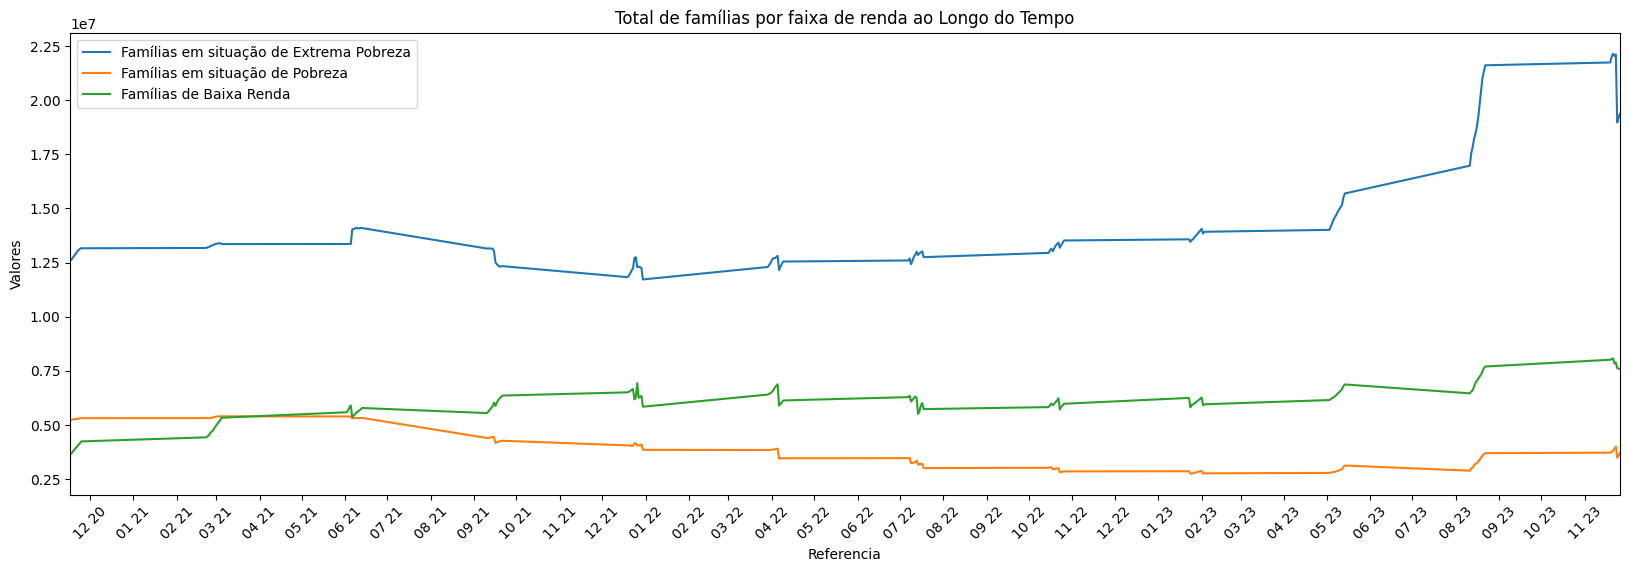

In [55]:
# Configure o tamanho do gráfico
fig = plt.figure(figsize=(20, 6))

# Plote a coluna 'fam_ext_pob'
plt.plot(df_cad_2012_2023_fam_brasil.index, df_cad_2012_2023_fam_brasil['total_fam_ext_pob'], label='Famílias em situação de Extrema Pobreza')

# Plote a coluna 'fam_pob'
plt.plot(df_cad_2012_2023_fam_brasil.index, df_cad_2012_2023_fam_brasil['total_fam_pob'], label='Famílias em situação de Pobreza')

# Plote a coluna 'fam_bx_renda'
plt.plot(df_cad_2012_2023_fam_brasil.index, df_cad_2012_2023_fam_brasil['total_fam_bx_renda'], label='Famílias de Baixa Renda')

# Adicione um título ao gráfico
plt.title('Total de famílias por faixa de renda ao Longo do Tempo')

# Configure os limites do eixo x
plt.xlim(df_cad_2012_2023_fam_brasil.index.min(), df_cad_2012_2023_fam_brasil.index.max())

# Adicione rótulos aos eixos
plt.xlabel('Referencia')
plt.ylabel('Valores')

# Colocar os nomes das variáveis inclinados
plt.xticks(rotation=45) 

# Define o intervalo desejado para os rótulos do eixo x (por exemplo, a cada 6 meses)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Formata os rótulos do eixo x (exibindo o mês e o ano)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m %y'))

# Adicione uma legenda
plt.legend()

# Exiba o gráfico
plt.show()

## Pessoas

In [56]:
df_cad_2012_2023_pes_brasil = df_cad_2012_2023_pes[['ibge_6','total_pes', 'total_pes_ate_meio_sm',
       'total_pes_pob', 'total_pes_ext_pob', 'total_pes_pob_e_ext_pob', 'total_pes_bx_renda']].groupby(df_cad_2012_2023_pes['referencia']).sum() 

In [57]:
df_cad_2012_2023_pes_brasil

,ibge_6,total_pes,total_pes_ate_meio_sm,total_pes_pob,total_pes_ext_pob,total_pes_pob_e_ext_pob,total_pes_bx_renda
referencia,,,,,,,
201204,1810321736,78085298.0,74663855.0,19387557.0,43980672.0,63368229.0,11295626.0
201205,1810321736,78085298.0,74663855.0,19387557.0,43980672.0,63368229.0,11295626.0
201206,1810321736,75535020.0,72056677.0,18643593.0,42231859.0,60875452.0,11181225.0
201207,1810321736,79184951.0,75476753.0,19371657.0,44277600.0,63649257.0,11827496.0
201208,1810321736,79618943.0,75794994.0,19370363.0,44381455.0,63751818.0,12043176.0
...,...,...,...,...,...,...,...
202304,1812247557,94434541.0,81880021.0,10390462.0,50703044.0,61093506.0,20786515.0
202305,1812247557,94592937.0,82289140.0,10577100.0,50860426.0,61437526.0,20851614.0
202306,1812247557,95140463.0,73714706.0,9191890.0,43299094.0,52490984.0,21223722.0


In [58]:
df_cad_2012_2023_pes_brasil.columns

Index(['ibge_6', 'total_pes', 'total_pes_ate_meio_sm', 'total_pes_pob',
       'total_pes_ext_pob', 'total_pes_pob_e_ext_pob', 'total_pes_bx_renda'],
      dtype='object')

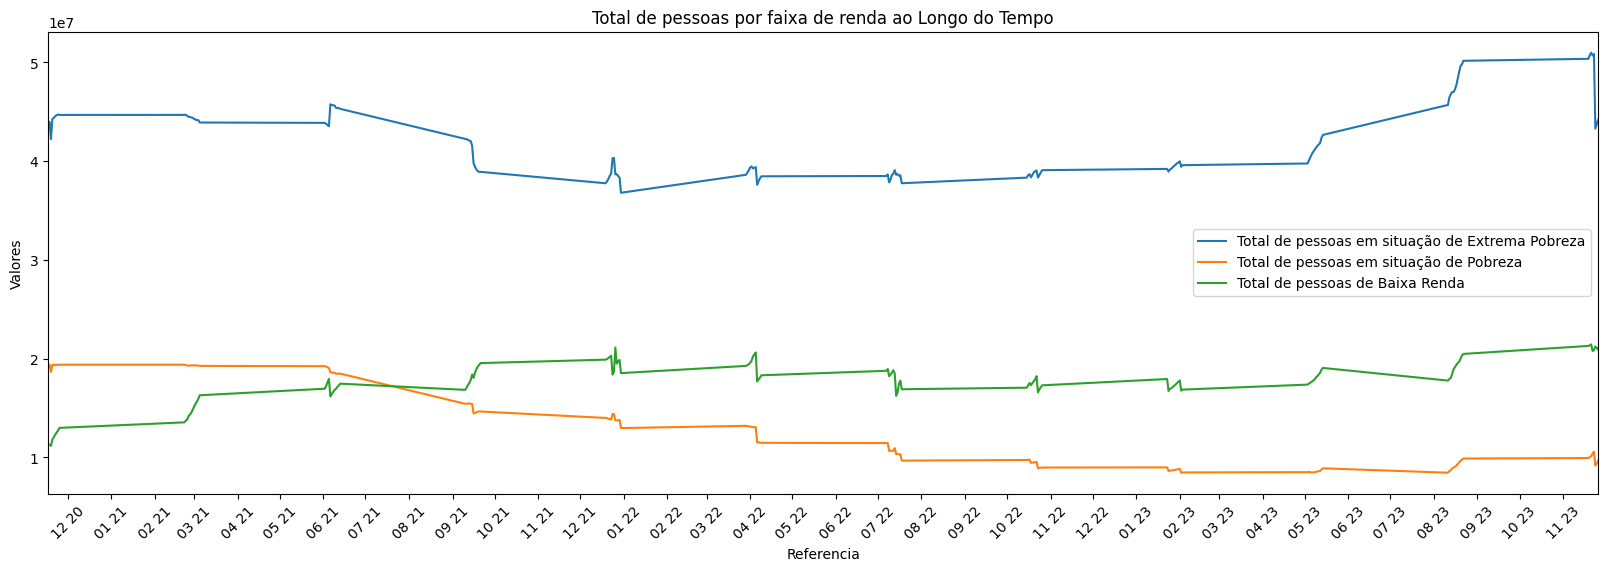

In [59]:
# Configure o tamanho do gráfico
fig = plt.figure(figsize=(20, 6))

# Plote a coluna 'pes_ext_pob'
plt.plot(df_cad_2012_2023_pes_brasil.index, df_cad_2012_2023_pes_brasil['total_pes_ext_pob'], label='Total de pessoas em situação de Extrema Pobreza')

# Plote a coluna 'pes_pob'
plt.plot(df_cad_2012_2023_pes_brasil.index, df_cad_2012_2023_pes_brasil['total_pes_pob'], label='Total de pessoas em situação de Pobreza')

# Plote a coluna 'pes_bx_renda'
plt.plot(df_cad_2012_2023_pes_brasil.index, df_cad_2012_2023_pes_brasil['total_pes_bx_renda'], label='Total de pessoas de Baixa Renda')

# Adicione um título ao gráfico
plt.title('Total de pessoas por faixa de renda ao Longo do Tempo')

# Configure os limites do eixo x
plt.xlim(df_cad_2012_2023_pes_brasil.index.min(), df_cad_2012_2023_pes_brasil.index.max())

# Adicione rótulos aos eixos
plt.xlabel('Referencia')
plt.ylabel('Valores')

# Colocar os nomes das variáveis inclinados
plt.xticks(rotation=45) 

# Define o intervalo desejado para os rótulos do eixo x (por exemplo, a cada 6 meses)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Formata os rótulos do eixo x (exibindo o mês e o ano)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m %y'))

# Adicione uma legenda
plt.legend()

# Exiba o gráfico
plt.show()

# Pegando os dados do IBGE de população dos Censos de 2010 e 2022
Para avaliação de alteração na renda das pessoas em dois períodos selecionados serão utilizados os dados do Cadastro Único relacionados ao total de pessoas na extrema pobreza e pobreza, e os dados da população dos municípios considerando os dois últimos Censos disponíveis.
De modo utilizar as bases de dados temporalmente mais próximas, serão utilizados os dados do Cadastro Único de abril/2012, por ser a primeira base que apresenta os dados de faixa de renda, e os dados do Cadastro Único de dezembro/2022.

In [60]:
caminho_pop_censo_2010 = 'Censo_2010_pop.xlsx'
caminho_pop_censo_2022 = 'Censo_2022_pop.xls'

In [61]:
pip install pandas xlrd --quiet

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import xlrd

### Censo 2010 - Tabela 4709 - População residente, Variação absoluta de população residente e Taxa de crescimento geométrico

In [63]:
pop_censo_2010 = pd.read_excel(caminho_pop_censo_2010,
                                skiprows = 1,
                                dtype = 'str')
pop_censo_2010.head(10)

,Variável - População residente (Pessoas),Unnamed: 1,Unnamed: 2
0,Cód.,Município,Ano x Situação do domicílio x Sexo
1,NaN,NaN,2010
2,NaN,NaN,Total
3,NaN,NaN,Total
4,1100015,Alta Floresta D'Oeste (RO),24392
5,1100023,Ariquemes (RO),90353
6,1100031,Cabixi (RO),6313
7,1100049,Cacoal (RO),78574
8,1100056,Cerejeiras (RO),17029
9,1100064,Colorado do Oeste (RO),18591


In [64]:
pop_censo_2010.describe()

,Variável - População residente (Pessoas),Unnamed: 1,Unnamed: 2
count,5567,5566,5569
unique,5567,5566,5046
top,Cód.,Município,4568
freq,1,1,4


In [65]:
#limpando a base do Censo 2010
pop_censo_2010 = pop_censo_2010.dropna(how='any')
pop_censo_2010.head(2)

,Variável - População residente (Pessoas),Unnamed: 1,Unnamed: 2
0,Cód.,Município,Ano x Situação do domicílio x Sexo
4,1100015,Alta Floresta D'Oeste (RO),24392


In [66]:
pop_censo_2010.head()

,Variável - População residente (Pessoas),Unnamed: 1,Unnamed: 2
0,Cód.,Município,Ano x Situação do domicílio x Sexo
4,1100015,Alta Floresta D'Oeste (RO),24392
5,1100023,Ariquemes (RO),90353
6,1100031,Cabixi (RO),6313
7,1100049,Cacoal (RO),78574


In [67]:
#Transformando a 1ª linha em nome das colunas
pop_censo_2010.columns = pop_censo_2010.iloc[0]
pop_censo_2010 = pop_censo_2010[1:] 

In [68]:
pop_censo_2010.head()

,Cód.,Município,Ano x Situação do domicílio x Sexo
4,1100015,Alta Floresta D'Oeste (RO),24392
5,1100023,Ariquemes (RO),90353
6,1100031,Cabixi (RO),6313
7,1100049,Cacoal (RO),78574
8,1100056,Cerejeiras (RO),17029


In [69]:
pop_censo_2010.columns

Index(['Cód.', 'Município', 'Ano x Situação do domicílio x Sexo'], dtype='object', name=0)

In [70]:
pop_censo_2010.rename(columns={'Cód.':'ibge_6','Município':'municipio', 'Ano x Situação do domicílio x Sexo': 'total_pop'}, inplace=True)

In [71]:
pop_censo_2010.head()

,ibge_6,municipio,total_pop
4,1100015,Alta Floresta D'Oeste (RO),24392
5,1100023,Ariquemes (RO),90353
6,1100031,Cabixi (RO),6313
7,1100049,Cacoal (RO),78574
8,1100056,Cerejeiras (RO),17029


In [72]:
pop_censo_2010.reset_index(inplace=True)

In [73]:
pop_censo_2010.head(2)

,index,ibge_6,municipio,total_pop
0,4,1100015,Alta Floresta D'Oeste (RO),24392
1,5,1100023,Ariquemes (RO),90353


In [74]:
pop_censo_2010.drop(columns={'index'}, inplace=True)

In [75]:
pop_censo_2010.head()

,ibge_6,municipio,total_pop
0,1100015,Alta Floresta D'Oeste (RO),24392
1,1100023,Ariquemes (RO),90353
2,1100031,Cabixi (RO),6313
3,1100049,Cacoal (RO),78574
4,1100056,Cerejeiras (RO),17029


In [76]:
pop_censo_2010['ibge_6'] = pop_censo_2010['ibge_6'].astype(str)

In [77]:
pop_censo_2010['ibge_6'] = pop_censo_2010['ibge_6'].str[:-1]

In [78]:
pop_censo_2010['ibge_6'] = pop_censo_2010['ibge_6'].astype(int)
pop_censo_2010['total_pop'] = pop_censo_2010['total_pop'].astype(float)

In [79]:
pop_censo_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ibge_6     5565 non-null   int32  
 1   municipio  5565 non-null   object 
 2   total_pop  5565 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 108.8+ KB


### Censo 2022 - Prévia da população calculada com base nos resultados do Censo Demográfico 2022 até 25 de dezembro de 2022

In [80]:
pop_censo_2022 = pd.read_excel(caminho_pop_censo_2022,
                                skiprows = 1,
                                dtype = 'str')
pop_censo_2022

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,00015,Alta Floresta D'Oeste,21558
1,RO,11,00023,Ariquemes,100896
2,RO,11,00031,Cabixi,5107
3,RO,11,00049,Cacoal,92202
4,RO,11,00056,Cerejeiras,15237
...,...,...,...,...,...
5600,(28) População judicial do município de Rodela...,NaN,NaN,NaN,NaN
5601,(29) População judicial do Município de Ribeir...,NaN,NaN,NaN,NaN
5602,(30) População judicial do Município de Planal...,NaN,NaN,NaN,NaN
5603,(31) População judicial do Município de Itacoa...,NaN,NaN,NaN,NaN


In [81]:
#limpando a base do Censo 2010
pop_censo_2022 = pop_censo_2022.dropna(how='any')
pop_censo_2022.head(2)

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,00015,Alta Floresta D'Oeste,21558
1,RO,11,00023,Ariquemes,100896


In [82]:
pop_censo_2022.columns

Index(['UF', 'COD. UF', 'COD. MUNIC', 'NOME DO MUNICÍPIO', 'POPULAÇÃO'], dtype='object')

In [83]:
pop_censo_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF                 5570 non-null   object
 1   COD. UF            5570 non-null   object
 2   COD. MUNIC         5570 non-null   object
 3   NOME DO MUNICÍPIO  5570 non-null   object
 4   POPULAÇÃO          5570 non-null   object
dtypes: object(5)
memory usage: 261.1+ KB


In [84]:
# Converta as colunas para strings
pop_censo_2022['COD. UF'] = pop_censo_2022['COD. UF'].astype(str)
pop_censo_2022['COD. MUNIC'] = pop_censo_2022['COD. MUNIC'].astype(str)

In [85]:
pop_censo_2022['ibge_6'] = pop_censo_2022['COD. UF'] + pop_censo_2022['COD. MUNIC']

In [86]:
pop_censo_2022.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,ibge_6
0,RO,11,00015,Alta Floresta D'Oeste,21558,1100015
1,RO,11,00023,Ariquemes,100896,1100023
2,RO,11,00031,Cabixi,5107,1100031
3,RO,11,00049,Cacoal,92202,1100049
4,RO,11,00056,Cerejeiras,15237,1100056


In [87]:
pop_censo_2022['ibge_6'] = pop_censo_2022['ibge_6'].str[:-1]

In [88]:
pop_censo_2022.columns

Index(['UF', 'COD. UF', 'COD. MUNIC', 'NOME DO MUNICÍPIO', 'POPULAÇÃO',
       'ibge_6'],
      dtype='object')

In [89]:
pop_censo_2022.drop(columns=['UF', 'COD. UF', 'COD. MUNIC'],inplace=True)

In [90]:
pop_censo_2022.columns

Index(['NOME DO MUNICÍPIO', 'POPULAÇÃO', 'ibge_6'], dtype='object')

In [91]:
pop_censo_2022 = pop_censo_2022[['ibge_6','NOME DO MUNICÍPIO', 'POPULAÇÃO']]
pop_censo_2022.columns

Index(['ibge_6', 'NOME DO MUNICÍPIO', 'POPULAÇÃO'], dtype='object')

In [92]:
pop_censo_2022.rename(columns={'NOME DO MUNICÍPIO':'municipio', 'POPULAÇÃO':'total_pop'}, inplace=True)

In [93]:
pop_censo_2022.head()

,ibge_6,municipio,total_pop
0,110001,Alta Floresta D'Oeste,21558
1,110002,Ariquemes,100896
2,110003,Cabixi,5107
3,110004,Cacoal,92202
4,110005,Cerejeiras,15237


In [94]:
pop_censo_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ibge_6     5570 non-null   object
 1   municipio  5570 non-null   object
 2   total_pop  5570 non-null   object
dtypes: object(3)
memory usage: 174.1+ KB


In [95]:
#identificando o erro ValueError: could not convert string to float: '461.748(1)' ao gerar o df com cruzamento
pop_censo_2022['total_pop'].loc[pop_censo_2022['total_pop']=='461.748(1)']

16    461.748(1)
Name: total_pop, dtype: object

In [96]:
#checando o município da linha 17. Identificado o problema na redação
pop_censo_2022.iloc[16]

ibge_6            110020
municipio    Porto Velho
total_pop     461.748(1)
Name: 16, dtype: object

In [97]:
pop_censo_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ibge_6     5570 non-null   object
 1   municipio  5570 non-null   object
 2   total_pop  5570 non-null   object
dtypes: object(3)
memory usage: 174.1+ KB


In [98]:
pop_censo_2022.columns

Index(['ibge_6', 'municipio', 'total_pop'], dtype='object')

In [99]:
#corrigindo os valores com (xx)
pop_censo_2022['total_pop'] = pop_censo_2022['total_pop'].apply(lambda s: s.replace(".", "").split("(")[0]).astype(int)

In [100]:
# Converta as colunas para strings
pop_censo_2022['ibge_6'] = pop_censo_2022['ibge_6'].astype(int)

In [101]:
pop_censo_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ibge_6     5570 non-null   int32 
 1   municipio  5570 non-null   object
 2   total_pop  5570 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 130.5+ KB


### Cruzando os dados do Cadastro de 04_2012 com os dados do Censo 2010

In [102]:
df_cad_2012_2023_pes.columns

Index(['ibge_6', 'referencia', 'total_pes', 'total_pes_ate_meio_sm',
       'total_pes_pob', 'total_pes_ext_pob', 'total_pes_pob_e_ext_pob',
       'total_pes_bx_renda'],
      dtype='object')

In [103]:
df_cad_2012_2023_pes_limpa = df_cad_2012_2023_pes.drop(columns={'total_pes', 'total_pes_ate_meio_sm',
       'total_pes_pob', 'total_pes_ext_pob', 'total_pes_bx_renda'})
df_cad_2012_2023_pes_limpa.head(2)

,ibge_6,referencia,total_pes_pob_e_ext_pob
0,110001,201212,11591.0
1,110002,201212,29553.0


In [104]:
df_cad_2012_2023_pes_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762976 entries, 0 to 44559
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ibge_6                   762976 non-null  int64  
 1   referencia               762976 non-null  int64  
 2   total_pes_pob_e_ext_pob  762976 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 23.3 MB


In [105]:
df_cad_2012_2023_pes_limpa = df_cad_2012_2023_pes_limpa[df_cad_2012_2023_pes_limpa['referencia']==201204]

In [106]:
df_cad_2012_2023_pes_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5565 entries, 44520 to 50084
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ibge_6                   5565 non-null   int64  
 1   referencia               5565 non-null   int64  
 2   total_pes_pob_e_ext_pob  5565 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 173.9 KB


In [107]:
df_cad_2012_2023_pes_limpa.columns

Index(['ibge_6', 'referencia', 'total_pes_pob_e_ext_pob'], dtype='object')

In [108]:
pop_censo_2010.columns

Index(['ibge_6', 'municipio', 'total_pop'], dtype='object', name=0)

In [109]:
pop_censo_2010.tail()

,ibge_6,municipio,total_pop
5560,522200,Vianópolis (GO),12548.0
5561,522205,Vicentinópolis (GO),7371.0
5562,522220,Vila Boa (GO),4735.0
5563,522230,Vila Propício (GO),5145.0
5564,530010,Brasília (DF),2570160.0


In [110]:
pop_censo_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ibge_6     5565 non-null   int32  
 1   municipio  5565 non-null   object 
 2   total_pop  5565 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 108.8+ KB


In [111]:
censo_2010_cad_2012 = pd.merge(df_cad_2012_2023_pes_limpa, pop_censo_2010, how='left')

In [112]:
censo_2010_cad_2012.head()

,ibge_6,referencia,total_pes_pob_e_ext_pob,municipio,total_pop
0,110001,201204,11501.0,Alta Floresta D'Oeste (RO),24392.0
1,110002,201204,28192.0,Ariquemes (RO),90353.0
2,110003,201204,2737.0,Cabixi (RO),6313.0
3,110004,201204,22896.0,Cacoal (RO),78574.0
4,110005,201204,6627.0,Cerejeiras (RO),17029.0


In [113]:
censo_2010_cad_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ibge_6                   5565 non-null   int64  
 1   referencia               5565 non-null   int64  
 2   total_pes_pob_e_ext_pob  5565 non-null   float64
 3   municipio                5565 non-null   object 
 4   total_pop                5565 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 217.5+ KB


In [114]:
censo_2010_cad_2012['tx_pob_extpob'] = censo_2010_cad_2012['total_pes_pob_e_ext_pob'] / censo_2010_cad_2012 ['total_pop']

In [115]:
censo_2010_cad_2012.head()

,ibge_6,referencia,total_pes_pob_e_ext_pob,municipio,total_pop,tx_pob_extpob
0,110001,201204,11501.0,Alta Floresta D'Oeste (RO),24392.0,0.471507
1,110002,201204,28192.0,Ariquemes (RO),90353.0,0.312021
2,110003,201204,2737.0,Cabixi (RO),6313.0,0.433550
3,110004,201204,22896.0,Cacoal (RO),78574.0,0.291394
4,110005,201204,6627.0,Cerejeiras (RO),17029.0,0.389160


## Avaliando os dados da Taxa de Pobreza e Extrema pobreza considerando o Censo de 2010 e o CadÚnico de 04/2012 em gráficos

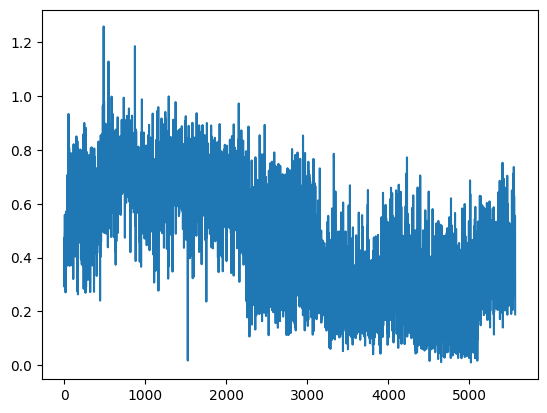

In [116]:
plt.plot(censo_2010_cad_2012['tx_pob_extpob']);

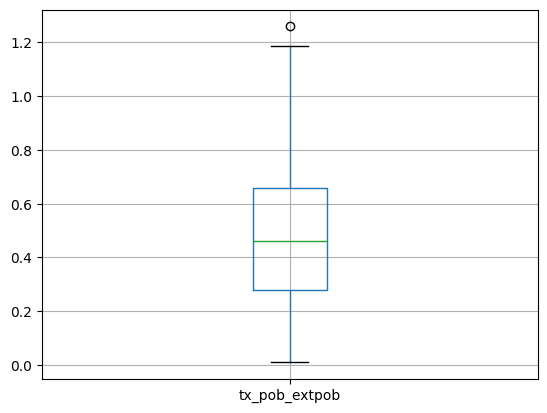

In [117]:
censo_2010_cad_2012[['tx_pob_extpob']].boxplot();

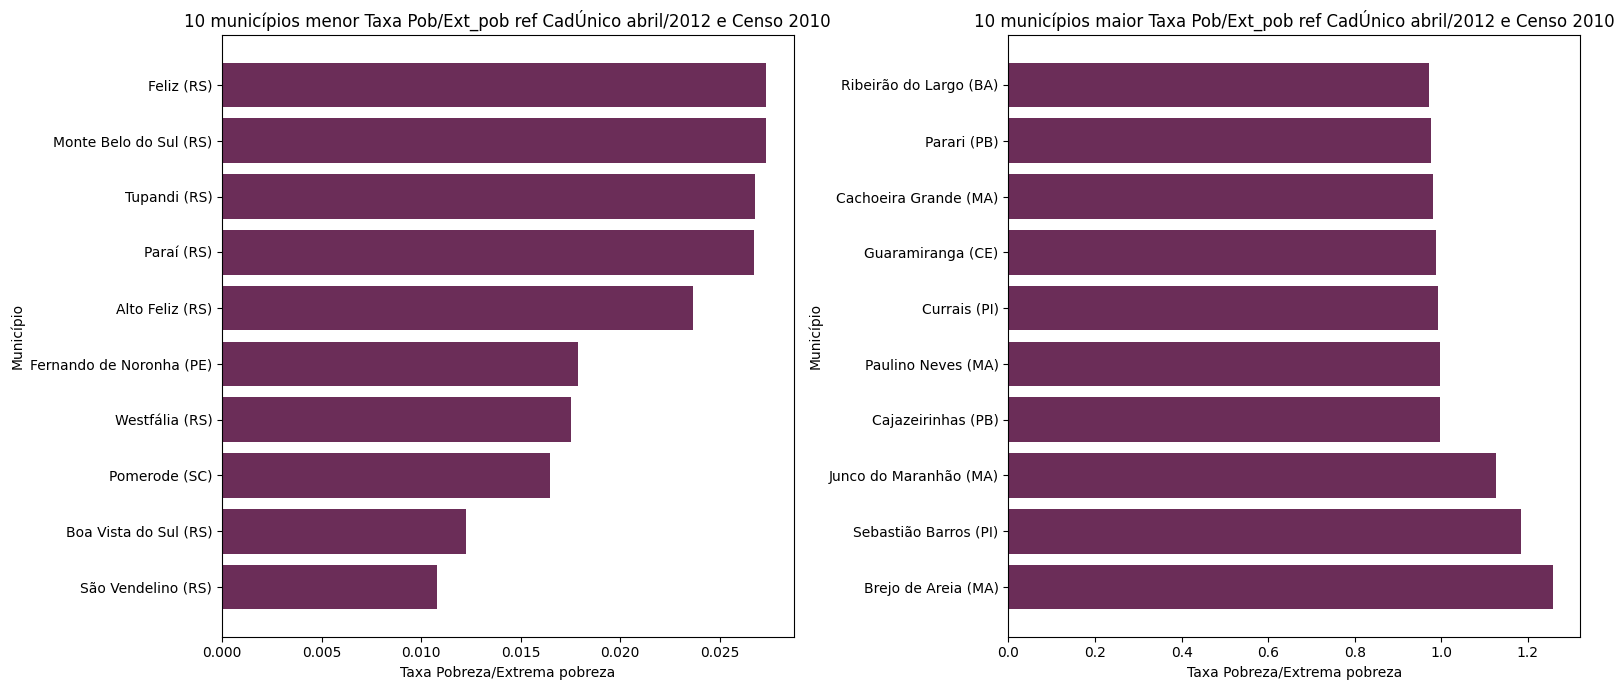

In [118]:
import matplotlib.pyplot as plt

# Ordene os valores de 'tx_pob_extpob' em ordem crescente para os 10 menores municípios
top_10_municipios_menos = censo_2010_cad_2012.sort_values(by='tx_pob_extpob', ascending=True).head(10)

# Ordene os valores de 'tx_pob_extpob' em ordem decrescente para os 10 maiores municípios
top_10_municipios_mais = censo_2010_cad_2012.sort_values(by='tx_pob_extpob', ascending=False).head(10)

# Crie uma figura com duas colunas para os gráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico para os 10 municípios com menor Taxa de pob_ext_pob
axs[0].barh(top_10_municipios_menos['municipio'], top_10_municipios_menos['tx_pob_extpob'], color='#6B2D58')
axs[0].set_xlabel('Taxa Pobreza/Extrema pobreza')
axs[0].set_ylabel('Município')
axs[0].set_title('10 municípios menor Taxa Pob/Ext_pob ref CadÚnico abril/2012 e Censo 2010')
axs[0].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


# Gráfico para os 10 municípios com maior Taxa de pob_ext_pob
axs[1].barh(top_10_municipios_mais['municipio'], top_10_municipios_mais['tx_pob_extpob'], color='#6B2D58')
axs[1].set_xlabel('Taxa Pobreza/Extrema pobreza')
axs[1].set_ylabel('Município')
axs[1].set_title('10 municípios maior Taxa Pob/Ext_pob ref CadÚnico abril/2012 e Censo 2010')
axs[1].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


plt.tight_layout()  # Ajusta o layout para evitar sobreposição

plt.show()

# Cruzando os dados do Cadastro de 12_2022 com os dados do Censo 2022

In [119]:
df_cad_2012_2023_pes.columns

Index(['ibge_6', 'referencia', 'total_pes', 'total_pes_ate_meio_sm',
       'total_pes_pob', 'total_pes_ext_pob', 'total_pes_pob_e_ext_pob',
       'total_pes_bx_renda'],
      dtype='object')

In [120]:
df_cad_2012_2023_pes_limpa_23 = df_cad_2012_2023_pes.drop(columns={'total_pes', 'total_pes_ate_meio_sm',
       'total_pes_pob', 'total_pes_ext_pob', 'total_pes_bx_renda'})

In [121]:
df_cad_2012_2023_pes_limpa_23.head()

,ibge_6,referencia,total_pes_pob_e_ext_pob
0,110001,201212,11591.0
1,110002,201212,29553.0
2,110003,201212,2712.0
3,110004,201212,21749.0
4,110005,201212,6594.0


In [122]:
df_cad_2012_2023_pes_limpa_23 = df_cad_2012_2023_pes_limpa_23[df_cad_2012_2023_pes_limpa_23['referencia']==202212]

In [123]:
df_cad_2012_2023_pes_limpa_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ibge_6                   5570 non-null   int64  
 1   referencia               5570 non-null   int64  
 2   total_pes_pob_e_ext_pob  5570 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 174.1 KB


In [124]:
df_cad_2012_2023_pes_limpa_23.head()

,ibge_6,referencia,total_pes_pob_e_ext_pob
0,110001,202212,5508.0
1,110002,202212,17660.0
2,110003,202212,908.0
3,110004,202212,17854.0
4,110005,202212,3416.0


In [125]:
pop_censo_2022.head()

,ibge_6,municipio,total_pop
0,110001,Alta Floresta D'Oeste,21558
1,110002,Ariquemes,100896
2,110003,Cabixi,5107
3,110004,Cacoal,92202
4,110005,Cerejeiras,15237


In [126]:
censo_2022_cad_2022 = pd.merge(df_cad_2012_2023_pes_limpa_23, pop_censo_2022, how='left')

In [127]:
censo_2022_cad_2022

,ibge_6,referencia,total_pes_pob_e_ext_pob,municipio,total_pop
0,110001,202212,5508.0,Alta Floresta D'Oeste,21558
1,110002,202212,17660.0,Ariquemes,100896
2,110003,202212,908.0,Cabixi,5107
3,110004,202212,17854.0,Cacoal,92202
4,110005,202212,3416.0,Cerejeiras,15237
...,...,...,...,...,...
5565,522200,202212,3122.0,Vianópolis,14046
5566,522205,202212,2179.0,Vicentinópolis,8776
5567,522220,202212,1954.0,Vila Boa,3686
5568,522230,202212,2347.0,Vila Propício,5646


In [128]:
censo_2022_cad_2022['tx_pob_extpob'] = censo_2022_cad_2022['total_pes_pob_e_ext_pob'] / censo_2022_cad_2022['total_pop']

In [129]:
censo_2022_cad_2022

,ibge_6,referencia,total_pes_pob_e_ext_pob,municipio,total_pop,tx_pob_extpob
0,110001,202212,5508.0,Alta Floresta D'Oeste,21558,0.255497
1,110002,202212,17660.0,Ariquemes,100896,0.175032
2,110003,202212,908.0,Cabixi,5107,0.177795
3,110004,202212,17854.0,Cacoal,92202,0.193640
4,110005,202212,3416.0,Cerejeiras,15237,0.224191
...,...,...,...,...,...,...
5565,522200,202212,3122.0,Vianópolis,14046,0.222270
5566,522205,202212,2179.0,Vicentinópolis,8776,0.248291
5567,522220,202212,1954.0,Vila Boa,3686,0.530114
5568,522230,202212,2347.0,Vila Propício,5646,0.415693


### Avaliando os dados da Taxa de Pobreza e Extrema pobreza considerando o Censo de 2022 e o CadÚnico de 12/2022 em gráficos

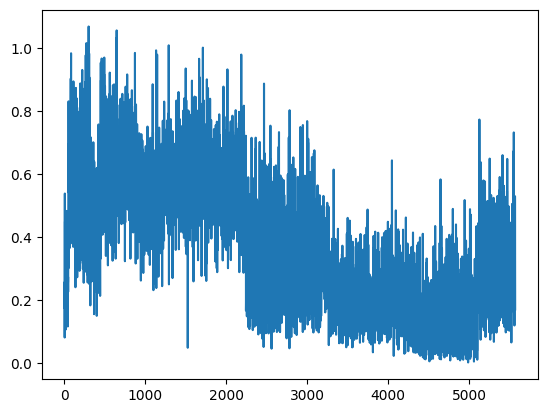

In [130]:
plt.plot(censo_2022_cad_2022['tx_pob_extpob']);

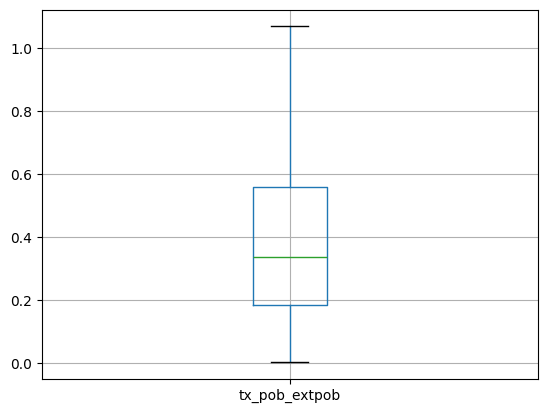

In [131]:
censo_2022_cad_2022[['tx_pob_extpob']].boxplot();

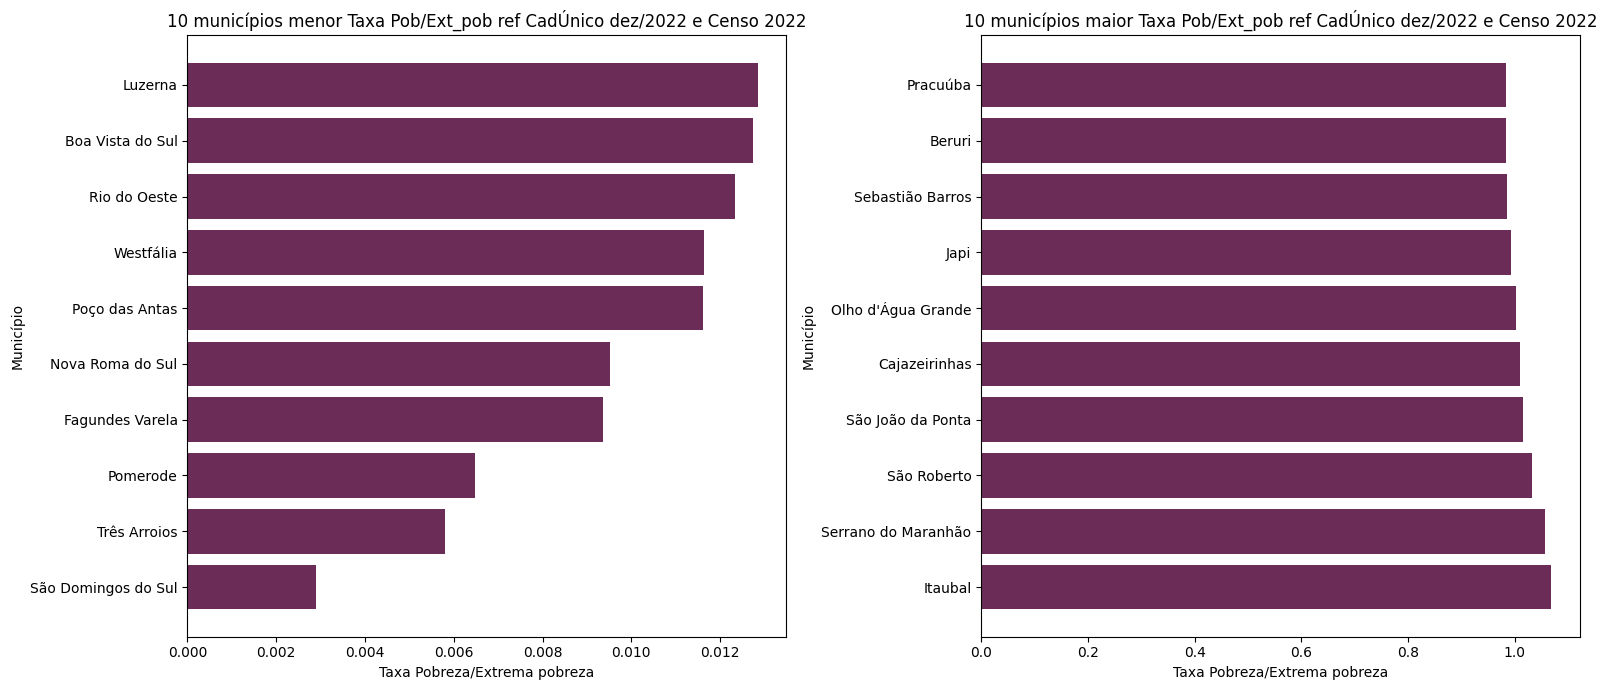

In [132]:
import matplotlib.pyplot as plt

# Ordene os valores de 'tx_pob_extpob' em ordem crescente para os 10 menores municípios
top_10_municipios_menos = censo_2022_cad_2022.sort_values(by='tx_pob_extpob', ascending=True).head(10)

# Ordene os valores de 'tx_pob_extpob' em ordem decrescente para os 10 maiores municípios
top_10_municipios_mais = censo_2022_cad_2022.sort_values(by='tx_pob_extpob', ascending=False).head(10)

# Crie uma figura com duas colunas para os gráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico para os 10 municípios com menor Taxa de pob_ext_pob
axs[0].barh(top_10_municipios_menos['municipio'], top_10_municipios_menos['tx_pob_extpob'], color='#6B2D58')
axs[0].set_xlabel('Taxa Pobreza/Extrema pobreza')
axs[0].set_ylabel('Município')
axs[0].set_title('10 municípios menor Taxa Pob/Ext_pob ref CadÚnico dez/2022 e Censo 2022')
axs[0].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


# Gráfico para os 10 municípios com maior Taxa de pob_ext_pob
axs[1].barh(top_10_municipios_mais['municipio'], top_10_municipios_mais['tx_pob_extpob'], color='#6B2D58')
axs[1].set_xlabel('Taxa Pobreza/Extrema pobreza')
axs[1].set_ylabel('Município')
axs[1].set_title('10 municípios maior Taxa Pob/Ext_pob ref CadÚnico dez/2022 e Censo 2022')
axs[1].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


plt.tight_layout()  # Ajusta o layout para evitar sobreposição

plt.show()

In [133]:
censo_2022_cad_2022.describe()

,ibge_6,referencia,total_pes_pob_e_ext_pob,total_pop,tx_pob_extpob
count,5570.000000,5570.0,5.570000e+03,5.570000e+03,5570.000000
mean,325358.627828,202212.0,1.078205e+04,3.729808e+04,0.373168
std,98491.033878,0.0,4.574598e+04,2.183690e+05,0.217162
min,110001.000000,202212.0,8.000000e+00,8.360000e+02,0.002904
25%,251212.500000,202212.0,1.528750e+03,5.281750e+03,0.184086
50%,314627.500000,202212.0,3.851000e+03,1.109550e+04,0.336262
75%,411918.750000,202212.0,9.535750e+03,2.461500e+04,0.558125
max,530010.000000,202212.0,2.151551e+06,1.220018e+07,1.068468


In [134]:
censo_2022_cad_2022.value_counts(censo_2022_cad_2022['tx_pob_extpob']>1)

tx_pob_extpob
False    5564
True        6
Name: count, dtype: int64

### Cruzando os dados do Cadastro de 08_2023 com os dados do Censo 2022

In [135]:
df_cad_2012_2023_pes.columns

Index(['ibge_6', 'referencia', 'total_pes', 'total_pes_ate_meio_sm',
       'total_pes_pob', 'total_pes_ext_pob', 'total_pes_pob_e_ext_pob',
       'total_pes_bx_renda'],
      dtype='object')

In [136]:
df_cad_2012_2023_pes.head()

,ibge_6,referencia,total_pes,total_pes_ate_meio_sm,total_pes_pob,total_pes_ext_pob,total_pes_pob_e_ext_pob,total_pes_bx_renda
0,110001,201212,14076.0,13170.0,4218.0,7373.0,11591.0,1579.0
1,110002,201212,37567.0,35934.0,14494.0,15059.0,29553.0,6381.0
2,110003,201212,3313.0,3219.0,1006.0,1706.0,2712.0,507.0
3,110004,201212,29459.0,27973.0,9776.0,11973.0,21749.0,6224.0
4,110005,201212,7918.0,7751.0,2889.0,3705.0,6594.0,1157.0


In [137]:
df_cad_2012_2023_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762976 entries, 0 to 44559
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ibge_6                   762976 non-null  int64  
 1   referencia               762976 non-null  int64  
 2   total_pes                762976 non-null  float64
 3   total_pes_ate_meio_sm    762976 non-null  float64
 4   total_pes_pob            762976 non-null  float64
 5   total_pes_ext_pob        762976 non-null  float64
 6   total_pes_pob_e_ext_pob  762976 non-null  float64
 7   total_pes_bx_renda       762976 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 52.4 MB


In [138]:
df_cad_2012_2023_pes_limpa_23_ago = df_cad_2012_2023_pes.drop(columns={'total_pes', 'total_pes_ate_meio_sm',
       'total_pes_pob', 'total_pes_ext_pob', 'total_pes_bx_renda'})

In [139]:
df_cad_2012_2023_pes_limpa_23_ago.columns

Index(['ibge_6', 'referencia', 'total_pes_pob_e_ext_pob'], dtype='object')

In [140]:
df_cad_2012_2023_pes_limpa_23_ago.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762976 entries, 0 to 44559
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ibge_6                   762976 non-null  int64  
 1   referencia               762976 non-null  int64  
 2   total_pes_pob_e_ext_pob  762976 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 23.3 MB


In [141]:
df_cad_2012_2023_pes_limpa_23_ago = df_cad_2012_2023_pes_limpa_23_ago[df_cad_2012_2023_pes_limpa_23_ago['referencia']==202308]

In [142]:
df_cad_2012_2023_pes_limpa_23_ago.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ibge_6                   5570 non-null   int64  
 1   referencia               5570 non-null   int64  
 2   total_pes_pob_e_ext_pob  5570 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 174.1 KB


In [143]:
df_cad_2012_2023_pes_limpa_23_ago.head()

,ibge_6,referencia,total_pes_pob_e_ext_pob
0,110001,202308,4579.0
1,110002,202308,16057.0
2,110003,202308,803.0
3,110004,202308,14969.0
4,110005,202308,3081.0


In [144]:
pop_censo_2022.head()

,ibge_6,municipio,total_pop
0,110001,Alta Floresta D'Oeste,21558
1,110002,Ariquemes,100896
2,110003,Cabixi,5107
3,110004,Cacoal,92202
4,110005,Cerejeiras,15237


In [145]:
censo_2022_cad_2023 = pd.merge(df_cad_2012_2023_pes_limpa_23_ago, pop_censo_2022, how='left')

In [146]:
censo_2022_cad_2023.head()

,ibge_6,referencia,total_pes_pob_e_ext_pob,municipio,total_pop
0,110001,202308,4579.0,Alta Floresta D'Oeste,21558
1,110002,202308,16057.0,Ariquemes,100896
2,110003,202308,803.0,Cabixi,5107
3,110004,202308,14969.0,Cacoal,92202
4,110005,202308,3081.0,Cerejeiras,15237


In [147]:
censo_2022_cad_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ibge_6                   5570 non-null   int64  
 1   referencia               5570 non-null   int64  
 2   total_pes_pob_e_ext_pob  5570 non-null   float64
 3   municipio                5570 non-null   object 
 4   total_pop                5570 non-null   int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 195.9+ KB


In [148]:
censo_2022_cad_2023['tx_pob_extpob'] = censo_2022_cad_2023['total_pes_pob_e_ext_pob'] / censo_2022_cad_2023['total_pop']

In [149]:
censo_2022_cad_2023.head()

,ibge_6,referencia,total_pes_pob_e_ext_pob,municipio,total_pop,tx_pob_extpob
0,110001,202308,4579.0,Alta Floresta D'Oeste,21558,0.212404
1,110002,202308,16057.0,Ariquemes,100896,0.159144
2,110003,202308,803.0,Cabixi,5107,0.157235
3,110004,202308,14969.0,Cacoal,92202,0.162350
4,110005,202308,3081.0,Cerejeiras,15237,0.202205


### Avaliando os dados da Taxa de Pobreza e Extrema pobreza considerando o Censo de 2022 e o CadÚnico de 12/2022 em gráficos

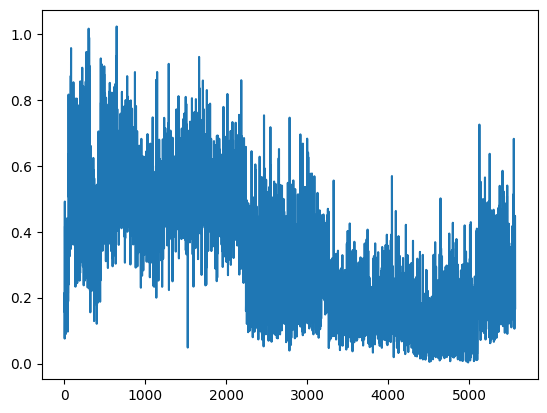

In [150]:
plt.plot(censo_2022_cad_2023['tx_pob_extpob']);

<Axes: >

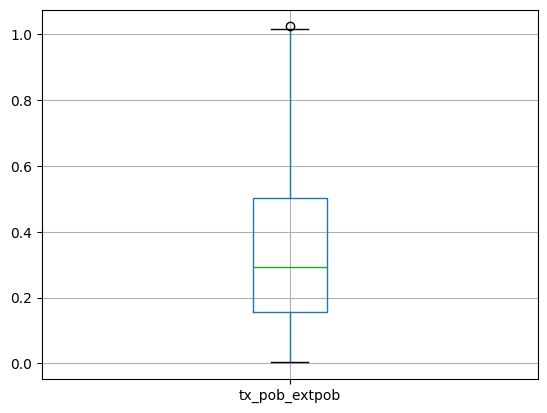

In [151]:
censo_2022_cad_2023[['tx_pob_extpob']].boxplot()

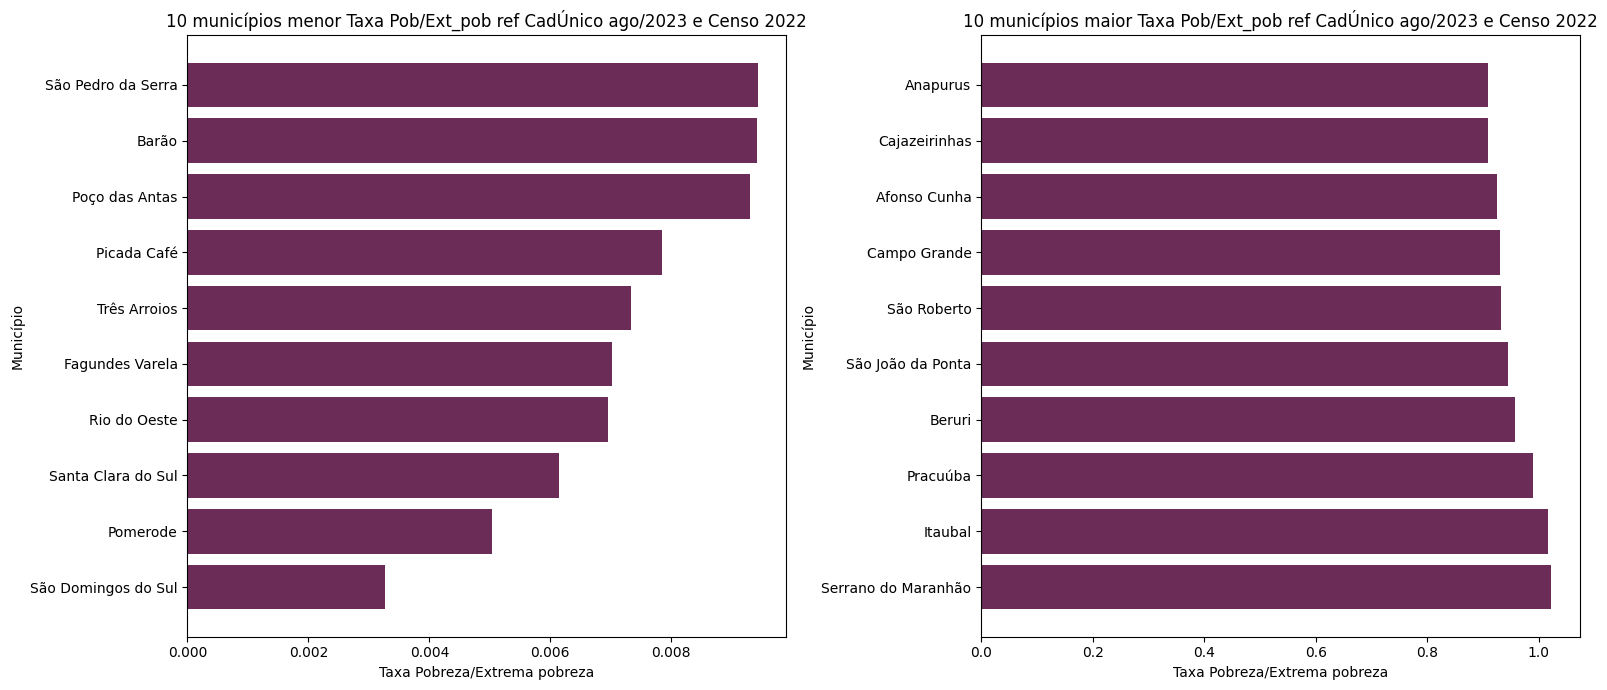

In [152]:
import matplotlib.pyplot as plt

# Ordene os valores de 'tx_pob_extpob' em ordem crescente para os 10 menores municípios
top_10_municipios_menos = censo_2022_cad_2023.sort_values(by='tx_pob_extpob', ascending=True).head(10)

# Ordene os valores de 'tx_pob_extpob' em ordem decrescente para os 10 maiores municípios
top_10_municipios_mais = censo_2022_cad_2023.sort_values(by='tx_pob_extpob', ascending=False).head(10)

# Crie uma figura com duas colunas para os gráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico para os 10 municípios com menor Taxa de pob_ext_pob
axs[0].barh(top_10_municipios_menos['municipio'], top_10_municipios_menos['tx_pob_extpob'], color='#6B2D58')
axs[0].set_xlabel('Taxa Pobreza/Extrema pobreza')
axs[0].set_ylabel('Município')
axs[0].set_title('10 municípios menor Taxa Pob/Ext_pob ref CadÚnico ago/2023 e Censo 2022')
axs[0].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


# Gráfico para os 10 municípios com maior Taxa de pob_ext_pob
axs[1].barh(top_10_municipios_mais['municipio'], top_10_municipios_mais['tx_pob_extpob'], color='#6B2D58')
axs[1].set_xlabel('Taxa Pobreza/Extrema pobreza')
axs[1].set_ylabel('Município')
axs[1].set_title('10 municípios maior Taxa Pob/Ext_pob ref CadÚnico ago/2023 e Censo 2022')
axs[1].tick_params(axis='x')  # Rotaciona os rótulos do eixo x


plt.tight_layout()  # Ajusta o layout para evitar sobreposição

plt.show()

In [153]:
censo_2022_cad_2023.describe()

,ibge_6,referencia,total_pes_pob_e_ext_pob,total_pop,tx_pob_extpob
count,5570.000000,5570.0,5.570000e+03,5.570000e+03,5570.000000
mean,325358.627828,202308.0,9.668652e+03,3.729808e+04,0.331962
std,98491.033878,0.0,4.079842e+04,2.183690e+05,0.201874
min,110001.000000,202308.0,9.000000e+00,8.360000e+02,0.003267
25%,251212.500000,202308.0,1.311000e+03,5.281750e+03,0.156245
50%,314627.500000,202308.0,3.407000e+03,1.109550e+04,0.292828
75%,411918.750000,202308.0,8.556250e+03,2.461500e+04,0.501319
max,530010.000000,202308.0,1.792650e+06,1.220018e+07,1.022857


In [154]:
censo_2022_cad_2023.value_counts(censo_2022_cad_2023['tx_pob_extpob']>1)

tx_pob_extpob
False    5568
True        2
Name: count, dtype: int64

## Comparação dados 2010 e 2022/2023

In [155]:
result = pd.merge(pd.DataFrame(censo_2010_cad_2012), pd.DataFrame(censo_2022_cad_2023), on='ibge_6', how='outer')
result

,ibge_6,referencia_x,total_pes_pob_e_ext_pob_x,municipio_x,total_pop_x,tx_pob_extpob_x,referencia_y,total_pes_pob_e_ext_pob_y,municipio_y,total_pop_y,tx_pob_extpob_y
0,110001,201204.0,11501.0,Alta Floresta D'Oeste (RO),24392.0,0.471507,202308,4579.0,Alta Floresta D'Oeste,21558,0.212404
1,110002,201204.0,28192.0,Ariquemes (RO),90353.0,0.312021,202308,16057.0,Ariquemes,100896,0.159144
2,110003,201204.0,2737.0,Cabixi (RO),6313.0,0.433550,202308,803.0,Cabixi,5107,0.157235
3,110004,201204.0,22896.0,Cacoal (RO),78574.0,0.291394,202308,14969.0,Cacoal,92202,0.162350
4,110005,201204.0,6627.0,Cerejeiras (RO),17029.0,0.389160,202308,3081.0,Cerejeiras,15237,0.202205
...,...,...,...,...,...,...,...,...,...,...,...
5565,150475,NaN,NaN,NaN,NaN,NaN,202308,12811.0,Mojuí dos Campos,22845,0.560779
5566,421265,NaN,NaN,NaN,NaN,NaN,202308,1618.0,Pescaria Brava,10224,0.158255
5567,422000,NaN,NaN,NaN,NaN,NaN,202308,3268.0,Balneário Rincão,15880,0.205793
5568,431454,NaN,NaN,NaN,NaN,NaN,202308,69.0,Pinto Bandeira,2712,0.025442


In [156]:
result.columns

Index(['ibge_6', 'referencia_x', 'total_pes_pob_e_ext_pob_x', 'municipio_x',
       'total_pop_x', 'tx_pob_extpob_x', 'referencia_y',
       'total_pes_pob_e_ext_pob_y', 'municipio_y', 'total_pop_y',
       'tx_pob_extpob_y'],
      dtype='object')

In [157]:
result = result.drop(columns={'total_pes_pob_e_ext_pob_x',
       'total_pop_x', 'total_pes_pob_e_ext_pob_y', 'total_pop_y'})

In [158]:
result['Dif_taxa_12_23'] = result['tx_pob_extpob_x'] - result['tx_pob_extpob_y']
result

,ibge_6,referencia_x,municipio_x,tx_pob_extpob_x,referencia_y,municipio_y,tx_pob_extpob_y,Dif_taxa_12_23
0,110001,201204.0,Alta Floresta D'Oeste (RO),0.471507,202308,Alta Floresta D'Oeste,0.212404,0.259103
1,110002,201204.0,Ariquemes (RO),0.312021,202308,Ariquemes,0.159144,0.152877
2,110003,201204.0,Cabixi (RO),0.433550,202308,Cabixi,0.157235,0.276315
3,110004,201204.0,Cacoal (RO),0.291394,202308,Cacoal,0.162350,0.129044
4,110005,201204.0,Cerejeiras (RO),0.389160,202308,Cerejeiras,0.202205,0.186955
...,...,...,...,...,...,...,...,...
5565,150475,NaN,NaN,NaN,202308,Mojuí dos Campos,0.560779,NaN
5566,421265,NaN,NaN,NaN,202308,Pescaria Brava,0.158255,NaN
5567,422000,NaN,NaN,NaN,202308,Balneário Rincão,0.205793,NaN
5568,431454,NaN,NaN,NaN,202308,Pinto Bandeira,0.025442,NaN


In [159]:
result.describe()

,ibge_6,referencia_x,tx_pob_extpob_x,referencia_y,tx_pob_extpob_y,Dif_taxa_12_23
count,5570.000000,5565.0,5565.000000,5570.0,5570.000000,5565.000000
mean,325358.627828,201204.0,0.465182,202308.0,0.331962,0.133113
std,98491.033878,0.0,0.218114,0.0,0.201874,0.100769
min,110001.000000,201204.0,0.010802,202308.0,0.003267,-0.353404
25%,251212.500000,201204.0,0.279588,202308.0,0.156245,0.066759
50%,314627.500000,201204.0,0.460186,202308.0,0.292828,0.132121
75%,411918.750000,201204.0,0.656949,202308.0,0.501319,0.201055
max,530010.000000,201204.0,1.257486,202308.0,1.022857,0.599203


## Vendo os resultados juntos para comparar

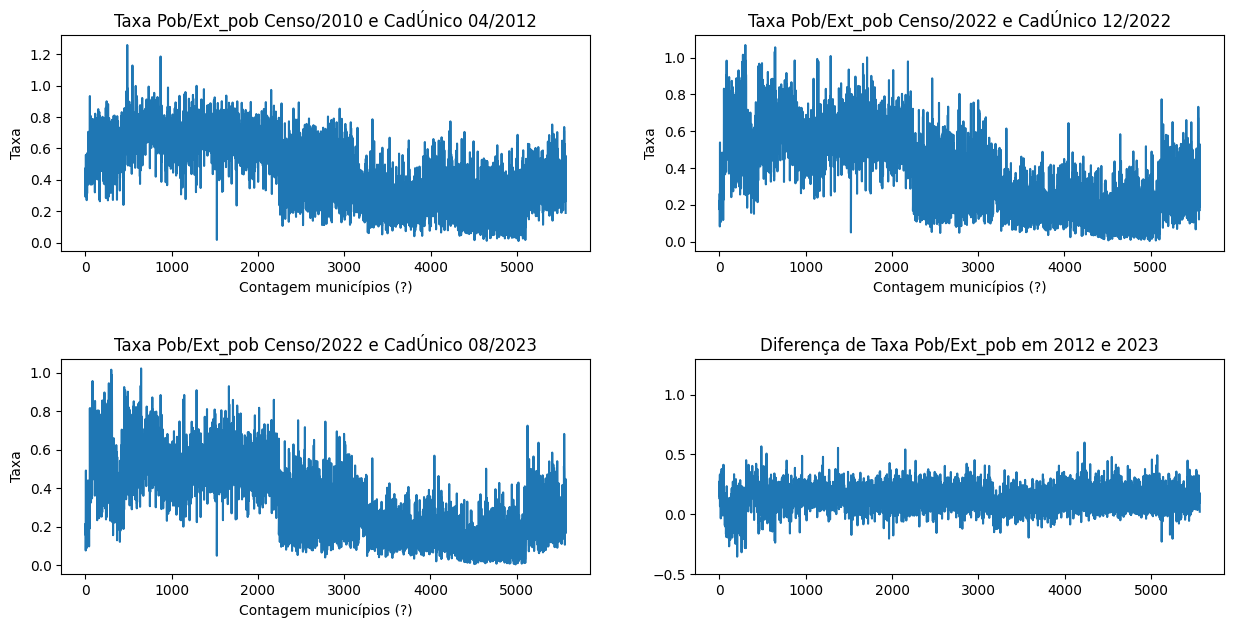

In [160]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(2, 2, 1)

ax2 = fig.add_subplot(2, 2, 2)

ax3 = fig.add_subplot(2, 2, 3)

ax4 = fig.add_subplot(2, 2, 4)

fig.subplots_adjust(hspace=0.5)  # Ajuste o valor de hspace conforme necessário

ax1.plot(censo_2010_cad_2012['tx_pob_extpob'])

ax2.plot(censo_2022_cad_2022['tx_pob_extpob'])

ax3.plot(censo_2022_cad_2023['tx_pob_extpob'])

ax4.plot(result['Dif_taxa_12_23'])

ax1.set(title='Taxa Pob/Ext_pob Censo/2010 e CadÚnico 04/2012',
       ylabel='Taxa', xlabel='Contagem municípios (?)')
plt.ylim(0.0, 1.3)

ax2.set(title='Taxa Pob/Ext_pob Censo/2022 e CadÚnico 12/2022',
       ylabel='Taxa', xlabel='Contagem municípios (?)')
plt.ylim(0.0, 1.4)

ax3.set(title='Taxa Pob/Ext_pob Censo/2022 e CadÚnico 08/2023',
       ylabel='Taxa', xlabel='Contagem municípios (?)')
plt.ylim(0.0, 1.3)

ax4.set(title='Diferença de Taxa Pob/Ext_pob em 2012 e 2023')
plt.ylim(-0.5, 1.3);


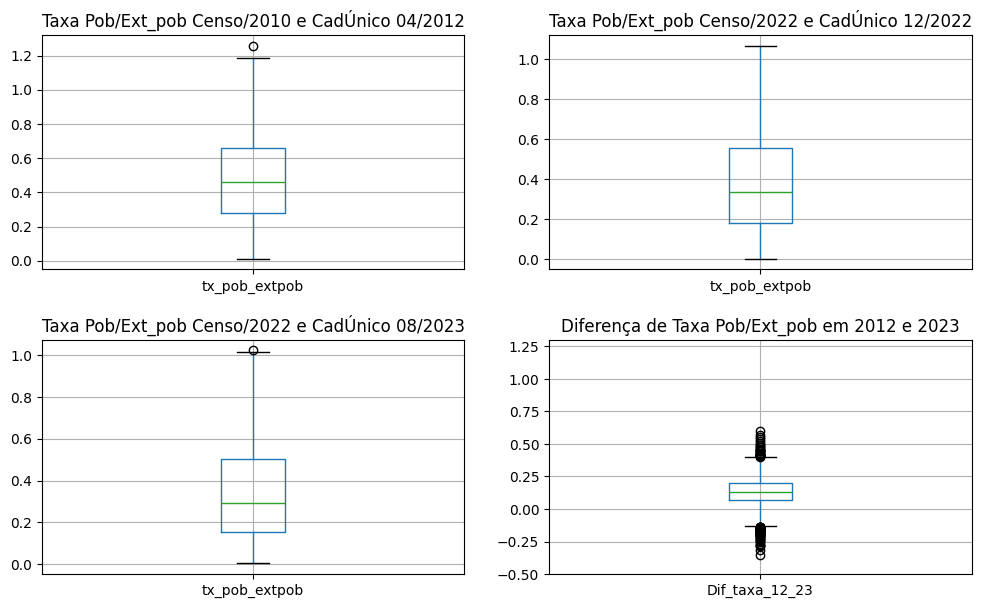

In [161]:
fig = plt.figure(figsize=(12, 7))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

fig.subplots_adjust(hspace=0.3)

# Plote o gráfico de caixa para a coluna 'tx_pob_extpob' em cada DataFrame
censo_2010_cad_2012.boxplot(column='tx_pob_extpob', ax=ax1)
censo_2022_cad_2022.boxplot(column='tx_pob_extpob', ax=ax2)
censo_2022_cad_2023.boxplot(column='tx_pob_extpob', ax=ax3)
result.boxplot(column='Dif_taxa_12_23', ax=ax4)

ax1.set(title='Taxa Pob/Ext_pob Censo/2010 e CadÚnico 04/2012')
plt.ylim(0.0, 1.3)

ax2.set(title='Taxa Pob/Ext_pob Censo/2022 e CadÚnico 12/2022')
plt.ylim(0.0, 1.4)

ax3.set(title='Taxa Pob/Ext_pob Censo/2022 e CadÚnico 08/2023')

ax4.set(title='Diferença de Taxa Pob/Ext_pob em 2012 e 2023')
plt.ylim(-0.5, 1.3)

plt.show()



# Mapas

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import os
import requests
import plotly.io as pio
import math
from geojson_rewind import rewind
import json
import requests, urllib3, ssl

pio.renderers.default = 'iframe'

In [163]:
#criando dataframe com informações de georreferenciamento de municípios
municipio_geo = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

#os dados de georreferenciamento tem 7 dígitos (vamos remover o dígito verificador e atualizar o dataframe)
municipio_geo['codigo_ibge'] = municipio_geo['codigo_ibge'].astype('str').map(lambda x: x[:-1]).astype('int')

### Taxa pessoas situação pobreza e extrema pobreza Censo 2010/CadÚnico 04/2012¶

In [164]:
# MESCLANDO as Bases para adicionar informações geográficas
censo_2010_cad_2012_geo = pd.merge(censo_2010_cad_2012, municipio_geo, left_on = ['ibge_6'], 
right_on=['codigo_ibge'], how = 'outer')
censo_2010_cad_2012_geo.drop(columns = 'codigo_ibge', inplace = True)
censo_2010_cad_2012_geo.drop(columns = 'total_pes_pob_e_ext_pob', inplace = True)
censo_2010_cad_2012_geo.drop(columns = 'total_pop', inplace = True)
censo_2010_cad_2012_geo.head(2)

,ibge_6,referencia,municipio,tx_pob_extpob,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,110001.0,201204.0,Alta Floresta D'Oeste (RO),0.471507,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
1,110002.0,201204.0,Ariquemes (RO),0.312021,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho


In [165]:
censo_2010_cad_2012_geo.columns

Index(['ibge_6', 'referencia', 'municipio', 'tx_pob_extpob', 'nome',
       'latitude', 'longitude', 'capital', 'codigo_uf', 'siafi_id', 'ddd',
       'fuso_horario'],
      dtype='object')

In [166]:
#puxar a malha geográfica do brasil a nível de município
import requests
geojson = requests.get(f'http://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio').json()

#a malha geográfica do ibge tem 7 dígitos (vamos remover o dígito verificador e atualizar a malha)
from geojson_rewind import rewind
for feature in geojson['features']:
    feature['properties']['codarea'] = feature['properties']['codarea'][:-1]
geojson = rewind(geojson, rfc7946=False)

In [167]:
#construir o mapa choroplético 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = px.choropleth(censo_2010_cad_2012_geo,
                    geojson=geojson,
                    title='Taxa pessoas em situação Pobreza/Extrema_pob CadÚnico 04/2012 considerando pop Censo/2010',
                    scope='south america',
                    color='tx_pob_extpob',
                    color_continuous_scale="Reds",
                    locations='ibge_6',
                    featureidkey='properties.codarea',
                    hover_name='municipio',
                    animation_frame='referencia').update_layout(height=800, width=1000, autosize=False)
    
fig.update_traces(marker_line_width=0)

fig.show()

### Taxa pessoas situação pobreza e extrema pobreza Censo 2022/CadÚnico 08/2023

In [168]:
# MESCLANDO as Bases para adicionar informações geográficas
censo_2022_cad_2023_geo = pd.merge(censo_2022_cad_2023, municipio_geo, left_on = ['ibge_6'], 
right_on=['codigo_ibge'], how = 'outer')
censo_2022_cad_2023_geo.drop(columns = 'codigo_ibge', inplace = True)
censo_2022_cad_2023_geo.drop(columns = 'total_pes_pob_e_ext_pob', inplace = True)
censo_2022_cad_2023_geo.drop(columns = 'total_pop', inplace = True)
censo_2022_cad_2023_geo.head(2)

,ibge_6,referencia,municipio,tx_pob_extpob,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,110001,202308,Alta Floresta D'Oeste,0.212404,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
1,110002,202308,Ariquemes,0.159144,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho


In [169]:
#puxar a malha geográfica do brasil a nível de município
import requests
geojson = requests.get(f'http://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio').json()

#a malha geográfica do ibge tem 7 dígitos (vamos remover o dígito verificador e atualizar a malha)
from geojson_rewind import rewind
for feature in geojson['features']:
    feature['properties']['codarea'] = feature['properties']['codarea'][:-1]
geojson = rewind(geojson, rfc7946=False)

In [170]:
#construir o mapa choroplético 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = px.choropleth(censo_2022_cad_2023_geo,
                    geojson=geojson,
                    title='Taxa pessoas em situação Pobreza/Extrema_pob CadÚnico 08/2023 considerando pop Censo/2022',
                    scope='south america',
                    color='tx_pob_extpob',
                    color_continuous_scale="Reds",
                    locations='ibge_6',
                    featureidkey='properties.codarea',
                    hover_name='municipio',
                    animation_frame='referencia').update_layout(height=800, width=1000, autosize=False)
    
fig.update_traces(marker_line_width=0)

fig.show()

### Diferença taxa pessoas situação pobreza e extrema pobreza 2012 x 2023

In [171]:
# MESCLANDO as Bases para adicionar informações geográficas
result_geo = pd.merge(result, municipio_geo, left_on = ['ibge_6'], 
right_on=['codigo_ibge'], how = 'outer')
result_geo.drop(columns = 'referencia_x', inplace = True)
result_geo.drop(columns = 'municipio_x', inplace = True)
result_geo.drop(columns = 'tx_pob_extpob_x', inplace = True)
result_geo.drop(columns = 'referencia_y', inplace = True)
result_geo.drop(columns = 'tx_pob_extpob_y', inplace = True)
result_geo.head(2)

,ibge_6,municipio_y,Dif_taxa_12_23,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,110001,Alta Floresta D'Oeste,0.259103,110001,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
1,110002,Ariquemes,0.152877,110002,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho


In [172]:
#puxar a malha geográfica do brasil a nível de município
import requests
geojson = requests.get(f'http://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio').json()

#a malha geográfica do ibge tem 7 dígitos (vamos remover o dígito verificador e atualizar a malha)
from geojson_rewind import rewind
for feature in geojson['features']:
    feature['properties']['codarea'] = feature['properties']['codarea'][:-1]
geojson = rewind(geojson, rfc7946=False)

In [173]:
#construir o mapa choroplético 
import plotly.express as px
import plotly.io as pio


# Encontre o valor mínimo e máximo na coluna 'Dif_taxa_12_23'
min_value = result_geo['Dif_taxa_12_23'].min()
max_value = result_geo['Dif_taxa_12_23'].max()

pio.renderers.default = 'iframe'

f

fig.update_traces(marker_line_width=0)

fig.show()



# Definindo uma escala para classificar a dif das taxas de pob/ext_pob 2012/2023

In [174]:
def mapear_valor(valor):
    if valor < (-0.2):
        return 1
    elif valor < (-0.1):
        return 2
    if valor == 0.0:
        return 3
    elif valor < 0.1:
        return 4
    elif valor < 0.2:
        return 5
    elif valor < 0.3:
        return 6
    elif valor < 0.4:
        return 7
    else:
        return 8

result['Classe_dif_taxa_12_23'] = result['Dif_taxa_12_23'].map(mapear_valor)

In [ ]:
result.head()

In [175]:
result['Classe_dif_taxa_12_23']

0       6
1       5
2       6
3       5
4       5
       ..
5565    8
5566    8
5567    8
5568    8
5569    8
Name: Classe_dif_taxa_12_23, Length: 5570, dtype: int64

In [189]:
result.head()

,ibge_6,referencia_x,municipio_x,tx_pob_extpob_x,referencia_y,municipio_y,tx_pob_extpob_y,Dif_taxa_12_23,Classe_dif_taxa_12_23
0,110001,201204.0,Alta Floresta D'Oeste (RO),0.471507,202308,Alta Floresta D'Oeste,0.212404,0.259103,6
1,110002,201204.0,Ariquemes (RO),0.312021,202308,Ariquemes,0.159144,0.152877,5
2,110003,201204.0,Cabixi (RO),0.433550,202308,Cabixi,0.157235,0.276315,6
3,110004,201204.0,Cacoal (RO),0.291394,202308,Cacoal,0.162350,0.129044,5
4,110005,201204.0,Cerejeiras (RO),0.389160,202308,Cerejeiras,0.202205,0.186955,5


In [176]:
indice_dif_taxa = result['Classe_dif_taxa_12_23'].value_counts()
indice_dif_taxa

Classe_dif_taxa_12_23
5    2082
4    1993
6    1165
7     212
2      60
8      40
1      18
Name: count, dtype: int64

In [177]:
indice_dif_tx = result['Classe_dif_taxa_12_23'].value_counts()
indice_dif_tx = pd.DataFrame(indice_dif_tx)
indice_dif_tx

,count
Classe_dif_taxa_12_23,
5,2082
4,1993
6,1165
7,212
2,60
8,40
1,18


In [183]:
indice_dif_tx = indice_dif_tx.reset_index()

In [184]:
indice_dif_tx.columns

Index(['Classe_dif_taxa_12_23', 'count'], dtype='object')

In [185]:
indice_dif_tx.head()

,Classe_dif_taxa_12_23,count
0,5,2082
1,4,1993
2,6,1165
3,7,212
4,2,60


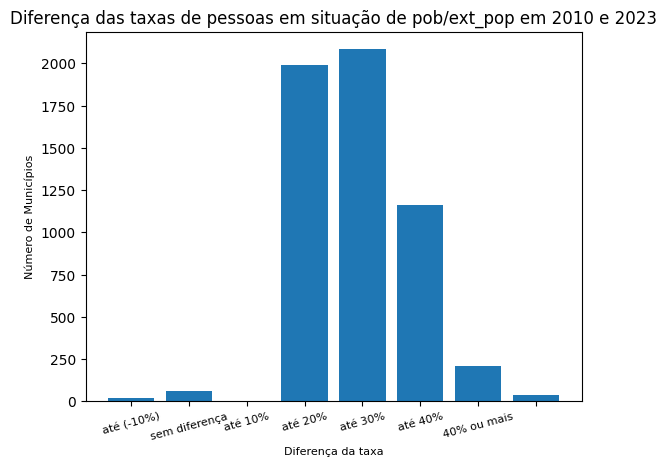

In [188]:
fig, ax = plt.subplots()

X = indice_dif_tx['Classe_dif_taxa_12_23']
Y = indice_dif_tx['count']
ax.bar(X, Y)

plt.title('Diferença das taxas de pessoas em situação de pob/ext_pop em 2010 e 2023')

ax.set_xticklabels(['(-20%) ou mais', 'até (-10%)','sem diferença', 'até 10%', 'até 20%', 'até 30%', 'até 40%', '40% ou mais'], 
                   rotation=15, fontsize=8)

ax.set_xlabel('Diferença da taxa', fontsize=8)

ax.set_ylabel('Número de Municípios', fontsize=8)

plt.show()

In [190]:
# Agora, para salvar este DataFrame em um arquivo CSV:
result.to_csv('resultado_tax_pob.csv', index=False)

